<a href="https://colab.research.google.com/github/amirhossian1393/Bootcamp-PythonTeek-FlightrRadarAPI/blob/main/Phase2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install FlightRadarAPI

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 19.9 MB/s eta 0:00:00


In [ ]:
from FlightRadar24.api import FlightRadar24API
fr_api = FlightRadar24API()

# Definition of tools used in reading images
from PIL import Image
import requests
from io import BytesIO

# This library will be used to display images
from matplotlib import pyplot as plt

# Map tool
import folium

In [17]:
b = "36.571,35.849,59.142,60.094"
flights = fr_api.get_flights("OIII")

In [18]:
flights

[<(B733) EP-FSU - Altitude: 33000 - Ground Speed: 456 - Heading: 76>,
 <(B735) EP-FSQ - Altitude: 34000 - Ground Speed: 456 - Heading: 203>]

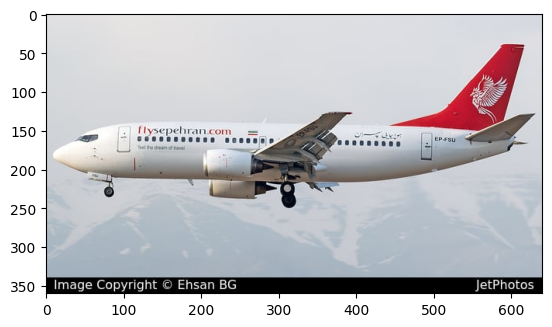

In [19]:
flight = flights[0]
flight_details = fr_api.get_flight_details(flight)

aircraft = flight_details['aircraft']
airline = flight_details['airline']

if flight_details['airport']['origin'] != None:
    origin = flight_details['airport']['origin']['name']
else:
    origin = None

if flight_details['airport']['destination'] != None:
    destination = flight_details['airport']['destination']['name']
    destination_icao = flight_details['airport']['destination']['code']['icao']
else:
    destination = None


response = flight_details['aircraft']['images']['large']
for r in response:
  curr_response = requests.get(r['src'])
  img2 = Image.open(BytesIO(curr_response.content))

  # Show the loaded image
  #img2.show()

  plt.imshow(img2,cmap='gray')
  plt.show()

In [20]:
if airline != None:
    print(aircraft['model']['text'], ": ", airline['name'], "/", airline['code']['icao'])
    print("{} ----> {}".format(origin, destination))


Boeing 737-36M :  Sepehran Airlines / SHI
Al Najaf International Airport ----> Mashhad International Airport


In [21]:
airport = fr_api.get_airport(destination_icao)
distance = flight.get_distance_from(airport)

print("{}km".format(distance))

897.4020761462864km
